In [1]:
"""Importing Libraries"""
"""These imported libraries will be used to data cleaning, transformation, exploration and visulizing the data"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

"""Setting Pandas Dataframe to display all columns"""
pd.set_option('display.max_columns', None)

In [2]:
"""Assigning APD dataset file path to a variable called APD_file"""
APD_file = 'APD_911_2019-2024.csv'

"""Reading APD dataset into pandas DataFrame called APD_df"""
APD_df = pd.read_csv(APD_file, low_memory=False)

In [3]:
"""Checking the total number of rows and columns in APD_df"""
APD_df.shape

(952832, 25)

In [4]:
"""Displaying the first 5 rows"""
APD_df.head(5)

,Incident Number,Incident Type,Mental Health Flag,Priority Level,Response Datetime,Response Day of Week,Response Hour,First Unit Arrived Datetime,Call Closed Datetime,Sector,Initial Problem Description,Initial Problem Category,Final Problem Description,Final Problem Category,Number of Units Arrived,Unit Time on Scene,Call Disposition Description,Report Written Flag,Response Time,Officer Injured/Killed Count,Subject Injured/Killed Count,Other Injured/Killed Count,Geo ID,Census Block Group,Council District
0,242741642,Dispatched Incident,Not Mental Health Incident,Priority 0,09/30/2024 11:55:58 PM,Mon,23.0,09/30/2024 11:58:35 PM,10/01/2024 01:22:16 AM,Edward,Prowler Hs,Suspicious Things,Prowler Hs,Suspicious Things,2.0,9989.0,No Report,No,222.0,0.0,0.0,0.0,4.845304e+11,4.530409e+09,4.0
1,242741639,Dispatched Incident,Not Mental Health Incident,Priority 2,09/30/2024 11:54:47 PM,Mon,23.0,10/01/2024 12:13:17 AM,10/01/2024 12:18:43 AM,David,Suspicious Vehicle,Suspicious Things,Suspicious Vehicle,Suspicious Things,2.0,611.0,No Report,No,1327.0,0.0,0.0,0.0,4.845300e+11,4.530013e+09,3.0
2,242741640,Dispatched Incident,Not Mental Health Incident,Priority 2,09/30/2024 11:54:36 PM,Mon,23.0,09/30/2024 11:58:12 PM,10/01/2024 12:50:04 AM,Ida,Alarm Burglar,Alarms,Alarm Burglar,Alarms,1.0,3112.0,False Alarm,No,243.0,0.0,0.0,0.0,4.845304e+11,4.530434e+09,4.0
3,242741638,Dispatched Incident,Mental Health Incident,Priority 3,09/30/2024 11:54:32 PM,Mon,23.0,10/01/2024 01:23:52 AM,10/01/2024 01:23:56 AM,Edward,Suspicious Person,Suspicious Things,Check Welfare Service,Welfare Check,1.0,4.0,No Report,No,5503.0,0.0,0.0,0.0,4.845304e+11,4.530442e+09,7.0
4,242741637,Dispatched Incident,Not Mental Health Incident,Priority 2,09/30/2024 11:54:09 PM,Mon,23.0,09/30/2024 11:58:19 PM,10/01/2024 12:43:52 AM,Frank,Crash Urgent,Crashes,Crash Urgent,Crashes,3.0,6063.0,No Report,No,335.0,0.0,0.0,0.0,4.845300e+11,4.530024e+09,2.0


In [5]:
"""Displaying all APD_df columns and their data type"""
APD_df.dtypes

Incident Number                  object
Incident Type                    object
Mental Health Flag               object
Priority Level                   object
Response Datetime                object
Response Day of Week             object
Response Hour                   float64
First Unit Arrived Datetime      object
Call Closed Datetime             object
Sector                           object
Initial Problem Description      object
Initial Problem Category         object
Final Problem Description        object
Final Problem Category           object
Number of Units Arrived         float64
Unit Time on Scene              float64
Call Disposition Description     object
Report Written Flag              object
Response Time                   float64
Officer Injured/Killed Count    float64
Subject Injured/Killed Count    float64
Other Injured/Killed Count      float64
Geo ID                          float64
Census Block Group              float64
Council District                float64


In [6]:
"""Printing out the number of missing values per column"""
APD_df.isna().sum()

Incident Number                  0
Incident Type                    4
Mental Health Flag               4
Priority Level                   4
Response Datetime                4
Response Day of Week             4
Response Hour                    4
First Unit Arrived Datetime      4
Call Closed Datetime             4
Sector                           4
Initial Problem Description      4
Initial Problem Category         4
Final Problem Description        4
Final Problem Category           4
Number of Units Arrived          4
Unit Time on Scene              24
Call Disposition Description     4
Report Written Flag              5
Response Time                    5
Officer Injured/Killed Count     5
Subject Injured/Killed Count     5
Other Injured/Killed Count       5
Geo ID                           8
Census Block Group               8
Council District                 5
dtype: int64

In [7]:
"""Creating a DataFrame based on rows where Response Time is null"""
null_response_time = APD_df[APD_df['Response Time'].isnull()]

In [8]:
"""Printing the DataFrame containing rows where Response Time is null"""
null_response_time

,Incident Number,Incident Type,Mental Health Flag,Priority Level,Response Datetime,Response Day of Week,Response Hour,First Unit Arrived Datetime,Call Closed Datetime,Sector,Initial Problem Description,Initial Problem Category,Final Problem Description,Final Problem Category,Number of Units Arrived,Unit Time on Scene,Call Disposition Description,Report Written Flag,Response Time,Officer Injured/Killed Count,Subject Injured/Killed Count,Other Injured/Killed Count,Geo ID,Census Block Group,Council District
952827,211730713,Dispatched Incident,Mental Health Incident,Priority 3,06/22/2021 01:00:57 PM,Tue,13.0,06/22/2021 01:24:17 PM,06/22/2021 01:24:29 PM,Baker,Check Welfare Service,Welfare Check,Check Welfare Service,Welfare Check,1.0,12.0,U{,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952828,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952829,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952830,"""status"" : 500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952831,},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
"""Checking the unique values of Incident Type. it's expected for the unique values to be Dispatched Incident and Officer initiated"""
APD_df['Incident Type'].unique()

array(['Dispatched Incident', nan], dtype=object)

In [10]:
"""Creating a DataFrame based on rows where Incident Type is null/nan"""
null_incident_type = APD_df[APD_df['Incident Type'].isnull()]

In [11]:
"""Printing the DataFrame containing rows where Incident Type is nan"""
null_incident_type

,Incident Number,Incident Type,Mental Health Flag,Priority Level,Response Datetime,Response Day of Week,Response Hour,First Unit Arrived Datetime,Call Closed Datetime,Sector,Initial Problem Description,Initial Problem Category,Final Problem Description,Final Problem Category,Number of Units Arrived,Unit Time on Scene,Call Disposition Description,Report Written Flag,Response Time,Officer Injured/Killed Count,Subject Injured/Killed Count,Other Injured/Killed Count,Geo ID,Census Block Group,Council District
952828,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952829,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952830,"""status"" : 500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952831,},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
"""Considering that the null values of Incident Type and Response Time seem to stem from computational errors and the sensitivity of the data"""
"""All rows with null values will therefore be deleted"""
APD_df = APD_df.dropna(axis=0).reset_index(drop=True)

In [13]:
"""Print the first four(4) rows of the New APD_df without missing values"""
APD_df.head(4)

,Incident Number,Incident Type,Mental Health Flag,Priority Level,Response Datetime,Response Day of Week,Response Hour,First Unit Arrived Datetime,Call Closed Datetime,Sector,Initial Problem Description,Initial Problem Category,Final Problem Description,Final Problem Category,Number of Units Arrived,Unit Time on Scene,Call Disposition Description,Report Written Flag,Response Time,Officer Injured/Killed Count,Subject Injured/Killed Count,Other Injured/Killed Count,Geo ID,Census Block Group,Council District
0,242741642,Dispatched Incident,Not Mental Health Incident,Priority 0,09/30/2024 11:55:58 PM,Mon,23.0,09/30/2024 11:58:35 PM,10/01/2024 01:22:16 AM,Edward,Prowler Hs,Suspicious Things,Prowler Hs,Suspicious Things,2.0,9989.0,No Report,No,222.0,0.0,0.0,0.0,4.845304e+11,4.530409e+09,4.0
1,242741639,Dispatched Incident,Not Mental Health Incident,Priority 2,09/30/2024 11:54:47 PM,Mon,23.0,10/01/2024 12:13:17 AM,10/01/2024 12:18:43 AM,David,Suspicious Vehicle,Suspicious Things,Suspicious Vehicle,Suspicious Things,2.0,611.0,No Report,No,1327.0,0.0,0.0,0.0,4.845300e+11,4.530013e+09,3.0
2,242741640,Dispatched Incident,Not Mental Health Incident,Priority 2,09/30/2024 11:54:36 PM,Mon,23.0,09/30/2024 11:58:12 PM,10/01/2024 12:50:04 AM,Ida,Alarm Burglar,Alarms,Alarm Burglar,Alarms,1.0,3112.0,False Alarm,No,243.0,0.0,0.0,0.0,4.845304e+11,4.530434e+09,4.0
3,242741638,Dispatched Incident,Mental Health Incident,Priority 3,09/30/2024 11:54:32 PM,Mon,23.0,10/01/2024 01:23:52 AM,10/01/2024 01:23:56 AM,Edward,Suspicious Person,Suspicious Things,Check Welfare Service,Welfare Check,1.0,4.0,No Report,No,5503.0,0.0,0.0,0.0,4.845304e+11,4.530442e+09,7.0


In [14]:
"""Checking the shape of the new APD_df without missing values"""
APD_df.shape

(952804, 25)

In [15]:
"""Cross-checking for missing values"""
APD_df.isnull().sum()

Incident Number                 0
Incident Type                   0
Mental Health Flag              0
Priority Level                  0
Response Datetime               0
Response Day of Week            0
Response Hour                   0
First Unit Arrived Datetime     0
Call Closed Datetime            0
Sector                          0
Initial Problem Description     0
Initial Problem Category        0
Final Problem Description       0
Final Problem Category          0
Number of Units Arrived         0
Unit Time on Scene              0
Call Disposition Description    0
Report Written Flag             0
Response Time                   0
Officer Injured/Killed Count    0
Subject Injured/Killed Count    0
Other Injured/Killed Count      0
Geo ID                          0
Census Block Group              0
Council District                0
dtype: int64

In [16]:
"""Checking for duplicate values within APD_df"""
APD_df.duplicated().sum()

0

In [17]:
"""Converting Datetime columns from string to datetime datatype"""
"""Explicting passing the format argument to speed up the conversion process"""

"""Converting First Unit Arrived Datetime column"""
APD_df['First Unit Arrived Datetime'] = pd.to_datetime(APD_df['First Unit Arrived Datetime'],
                                                       format="%m/%d/%Y %I:%M:%S %p", errors='coerce')

"""Converting Response Datetime column"""
APD_df['Response Datetime'] = pd.to_datetime(APD_df['Response Datetime'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')

"""Converting Call Closed Datetime column"""
APD_df['Call Closed Datetime'] = pd.to_datetime(APD_df['Call Closed Datetime'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')

In [18]:
priority_map = {
    'Priority 0': 0,
    'Priority 1': 1,
    'Priority 2': 2,
    'Priority 3': 3
}

APD_df['Priority Level'] = APD_df['Priority Level'].map(priority_map)

In [19]:
APD_df.head(3)

,Incident Number,Incident Type,Mental Health Flag,Priority Level,Response Datetime,Response Day of Week,Response Hour,First Unit Arrived Datetime,Call Closed Datetime,Sector,Initial Problem Description,Initial Problem Category,Final Problem Description,Final Problem Category,Number of Units Arrived,Unit Time on Scene,Call Disposition Description,Report Written Flag,Response Time,Officer Injured/Killed Count,Subject Injured/Killed Count,Other Injured/Killed Count,Geo ID,Census Block Group,Council District
0,242741642,Dispatched Incident,Not Mental Health Incident,0,2024-09-30 23:55:58,Mon,23.0,2024-09-30 23:58:35,2024-10-01 01:22:16,Edward,Prowler Hs,Suspicious Things,Prowler Hs,Suspicious Things,2.0,9989.0,No Report,No,222.0,0.0,0.0,0.0,4.845304e+11,4.530409e+09,4.0
1,242741639,Dispatched Incident,Not Mental Health Incident,2,2024-09-30 23:54:47,Mon,23.0,2024-10-01 00:13:17,2024-10-01 00:18:43,David,Suspicious Vehicle,Suspicious Things,Suspicious Vehicle,Suspicious Things,2.0,611.0,No Report,No,1327.0,0.0,0.0,0.0,4.845300e+11,4.530013e+09,3.0
2,242741640,Dispatched Incident,Not Mental Health Incident,2,2024-09-30 23:54:36,Mon,23.0,2024-09-30 23:58:12,2024-10-01 00:50:04,Ida,Alarm Burglar,Alarms,Alarm Burglar,Alarms,1.0,3112.0,False Alarm,No,243.0,0.0,0.0,0.0,4.845304e+11,4.530434e+09,4.0


## Expolatory Data Analysis

### Examining the occurrence of categorical variables using seaborn countplot

In [20]:
"""Creating a list containing all Categorical columns """
categorical_columns = APD_df.select_dtypes(include='object').drop(columns=['Incident Number','Initial Problem Description', 
                                                                      'Final Problem Description']).columns.tolist()

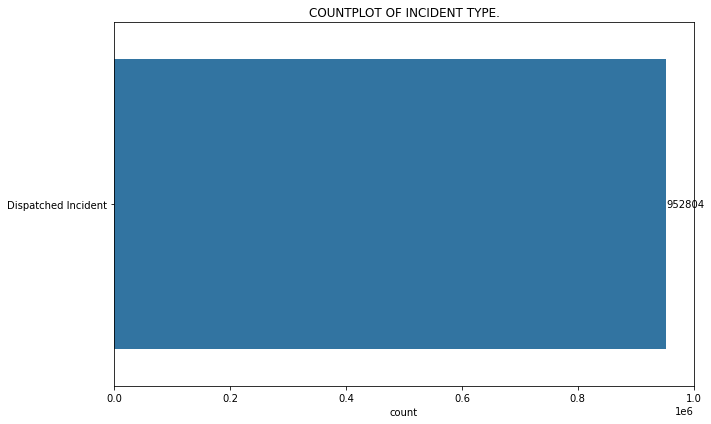

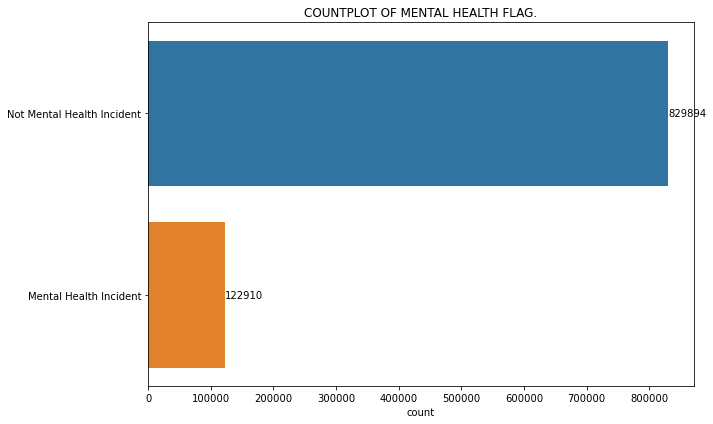

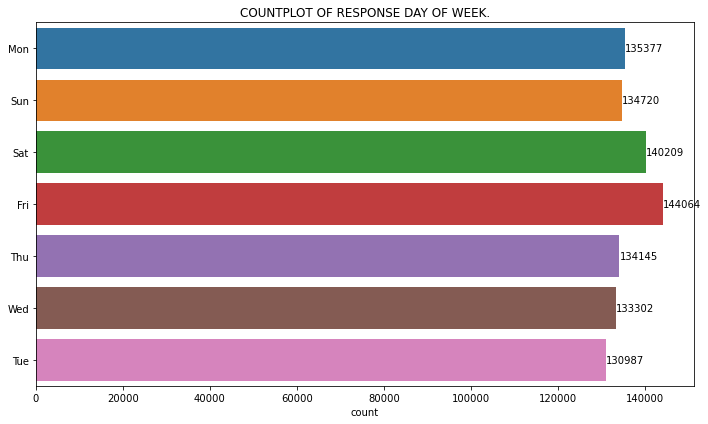

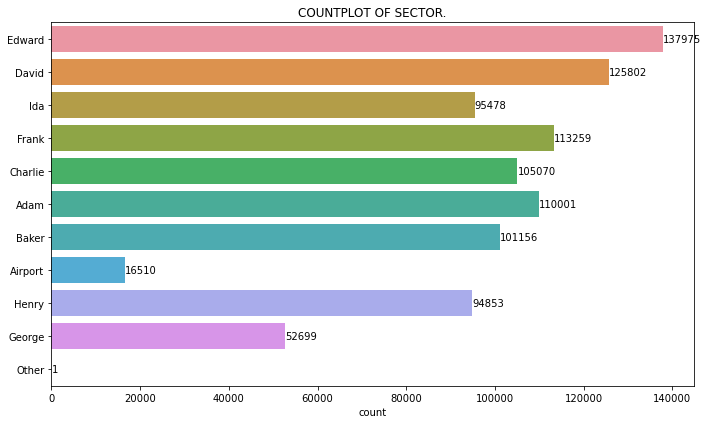

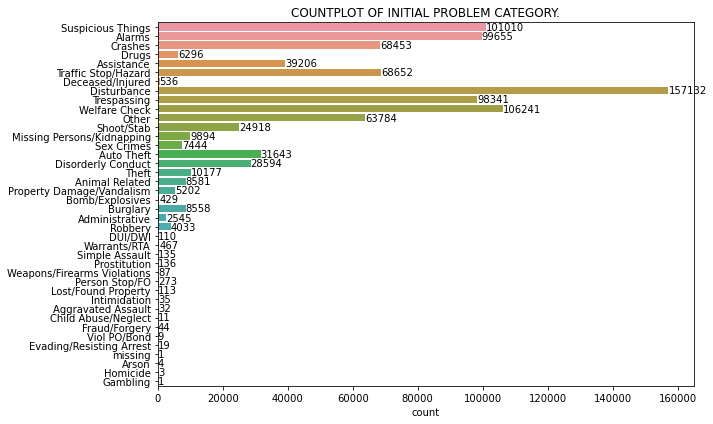

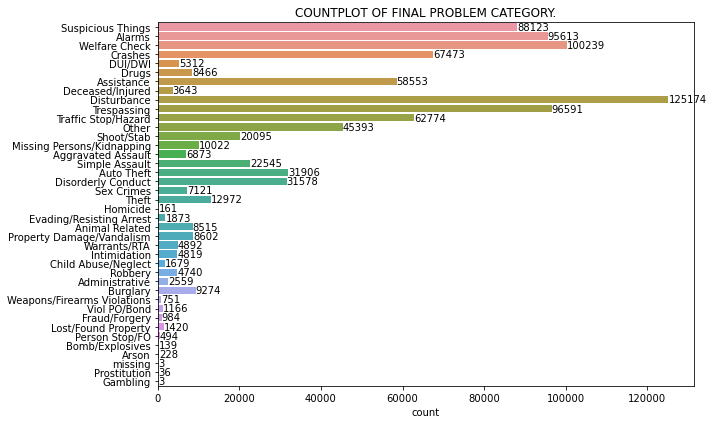

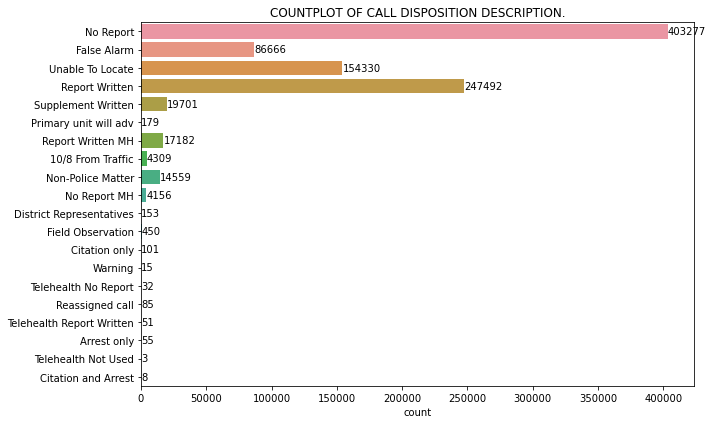

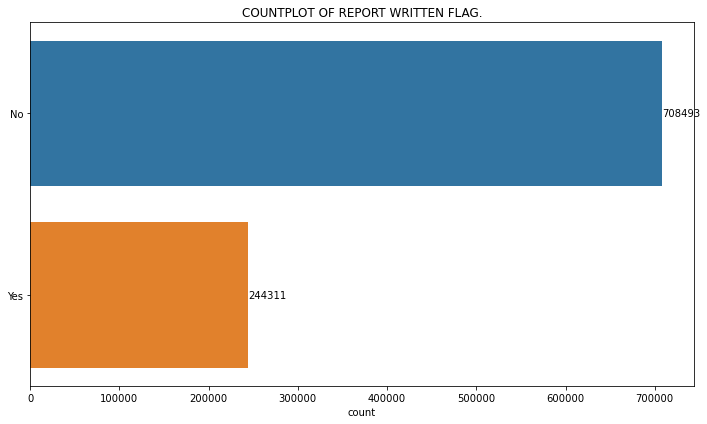

In [21]:
"""Creating a Countplot to show the occurrence of each unique values in selected categorical columns"""
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=APD_df, y=col)
    
    for container in ax.containers:
        ax.bar_label(container, size=10)
    
    plt.title(f"COUNTPLOT OF {col.upper()}.")
    plt.ylabel(f"")
    plt.tight_layout()
    plt.show()

### Examining the distribution of variables using seaborn histplot

In [22]:
"""Creating a list containing all numerical variables columns within numerical_df except the ones dropped as specificed below"""

numerical_columns = APD_df.select_dtypes(exclude='object').drop(columns=['Response Datetime', 'First Unit Arrived Datetime',
                                                                   'Call Closed Datetime', 'Census Block Group', 'Geo ID']).columns.tolist()

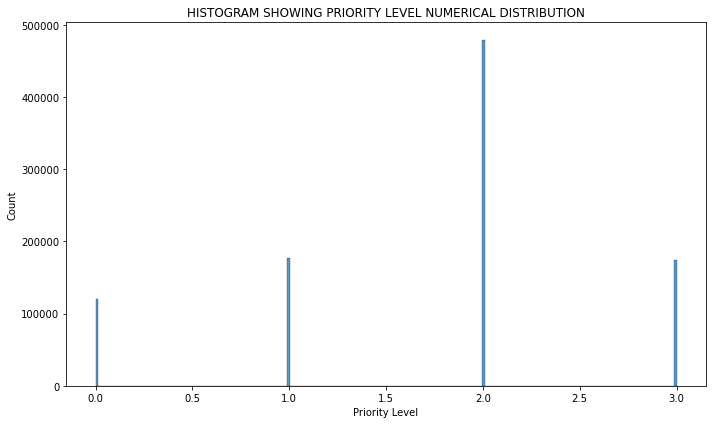

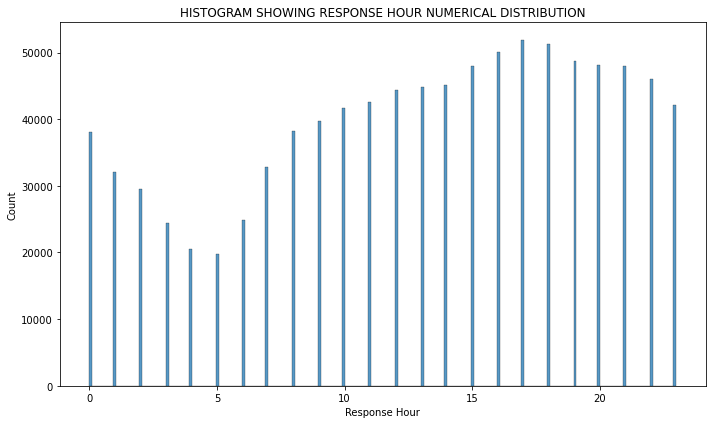

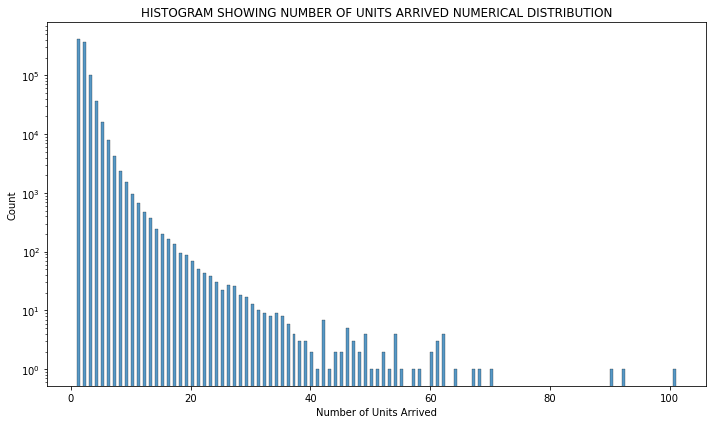

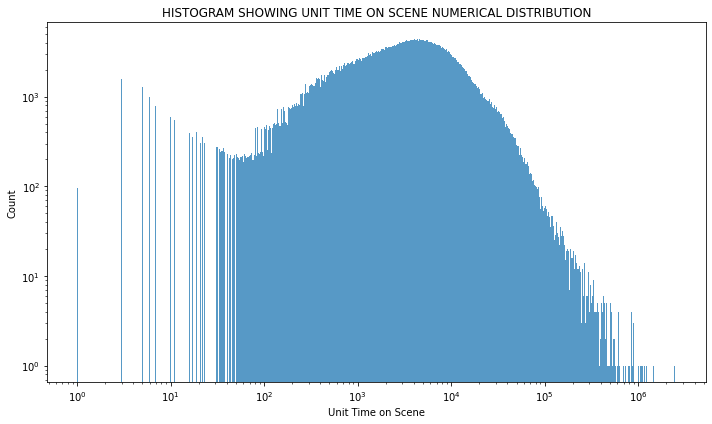

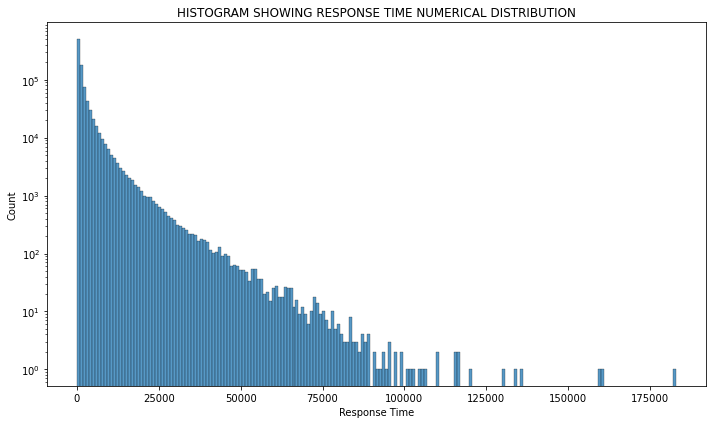

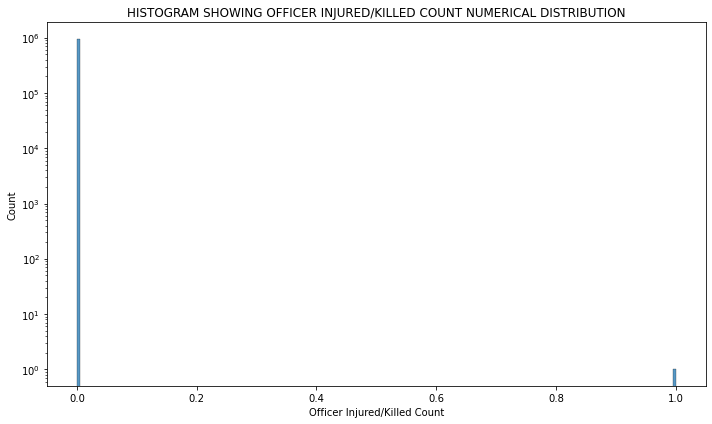

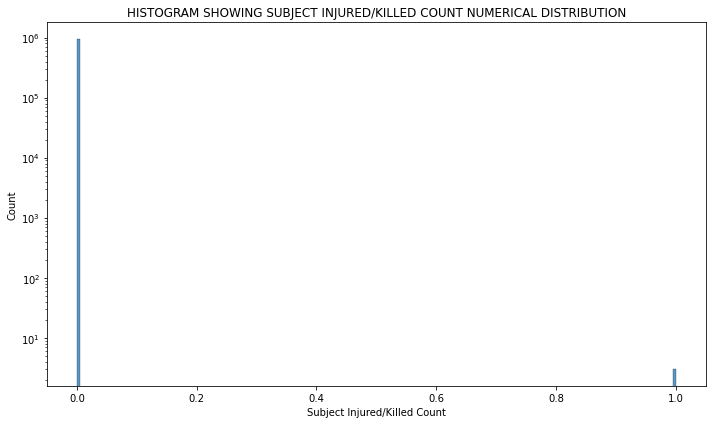

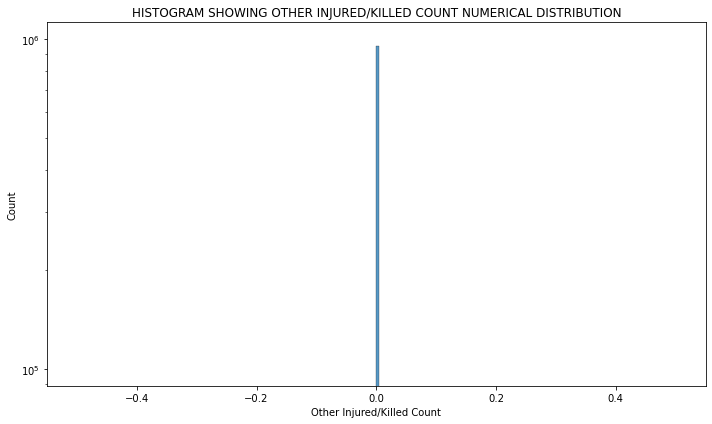

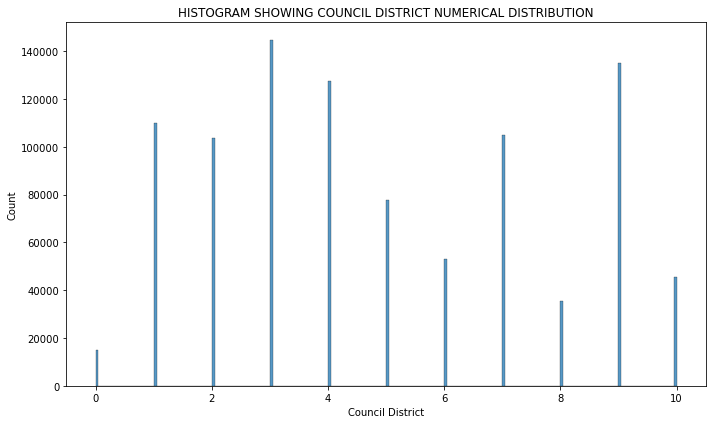

In [23]:
"""Plotting a histogram to show the distribution of Numerical variables within the numerical_df DataFFrame"""
for col in numerical_columns:
    logy_scale = ['Number of Units Arrived', 'Unit Time on Scene', 'Response Time', 'Officer Injured/Killed Count', 'Subject Injured/Killed Count', 'Other Injured/Killed Count']
    plt.figure(figsize=(10, 6))
    
    if col =='Unit Time on Scene':       
        sns.histplot(data=APD_df, x='Unit Time on Scene', bins=np.logspace(0, 6.4, 1000))    # Transforming the distribution of Unit Time on Scene into logarithmic scale due to the vast difference between the min and max values 
        plt.xscale('log')
    else:
        sns.histplot(data=APD_df, x=col, bins=200)
    
    if col in logy_scale:
        plt.yscale('log')
    else:
        plt.yscale('linear')
    
    plt.title(f"HISTOGRAM SHOWING {col.upper()} NUMERICAL DISTRIBUTION")
    plt.tight_layout()
    plt.show()

### Factors affecting Incident response Time

To Identify the Features or columns that affects incident Response Time APD_df Dataframe will be divided into two DataFrame based on the type of Datatype (Categorical and Numerical). Columns such as Datetime columns and Incident numbers will be dropped. To identify columns or Features with possible relationship/effect the following methods will be employed;

1) Feature Selection using mutual_info_regression
2) Spearman correlation

After identifying the top columns scatter plot and box plot will used to visualize their correlation.

#### Categorical Features / Columns

In [24]:
"""Importing category_emcoders for encoding categorical features"""
import category_encoders as ce

In [25]:
"""Assigning all categorical columns to X and Response Time to y"""
X = APD_df.select_dtypes(include='object').drop(columns=['Incident Number'])
y = APD_df['Response Time']

In [26]:
"""Initializing category_encoders TargetEncoder library of Target encoding"""
target_encoder = ce.TargetEncoder()

In [27]:
"""Target encoding the categorical columns (features) and assigning the resulting to dataframe to X_encoded """
X_encoded = target_encoder.fit_transform(X, y)

In [28]:
"""Importing mutual_info_regression for feature selection"""
from sklearn.feature_selection import mutual_info_regression

In [29]:
"""Selecting categorical features which are relevant for predicting Response Time of a reported incident using mutual_info_regression"""
mi_scores = mutual_info_regression(X_encoded, y, n_jobs=-1)

In [30]:
"""Creating a pandas DataFrame to store the resulting scores of each features"""
mi_scores_cat_df = pd.DataFrame(mi_scores, index=X_encoded.columns, columns=['mutual_info_score'])

In [31]:
mi_scores_cat_df = mi_scores_cat_df.sort_values(ascending=False, by='mutual_info_score')

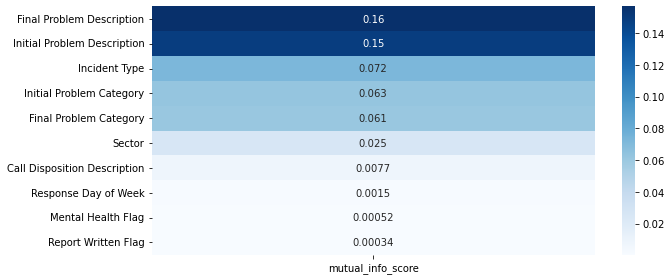

In [32]:
plt.figure(figsize=(10, 4))
sns.heatmap(data=mi_scores_cat_df, cmap='Blues', annot=True)
plt.tight_layout()
plt.show()

In [33]:
# Perform correlation analysis between encoded categorical features and Response Time to identify significant relationships"""
# This helps in gaining insights into how categorical features are associated with Incident Response Time."""
categorical_corr_analysis = X_encoded.corrwith(APD_df['Response Time'], method='spearman').map('{:.4f}'.format)

C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [34]:
# Convert the resulting Series into a DataFrame to better organize the correlation results"""
# The DataFrame will have one column for the correlation coefficient with Response Time""" 
categorical_corr_analysis_df = categorical_corr_analysis.to_frame(name='Response Time Correlation_coefficient')

In [35]:
# Convert the correlation coefficients from string format (formatted to 4 decimal places) to float type for further numerical analysis.
categorical_corr_analysis_df['Response Time Correlation_coefficient'] = categorical_corr_analysis_df['Response Time Correlation_coefficient'].astype('float64')


In [36]:
# Sort the DataFrame in descending order based on the correlation coefficient to prioritize features most related to Response Time.
categorical_corr_analysis_df = categorical_corr_analysis_df.sort_values(ascending=False, by='Response Time Correlation_coefficient')

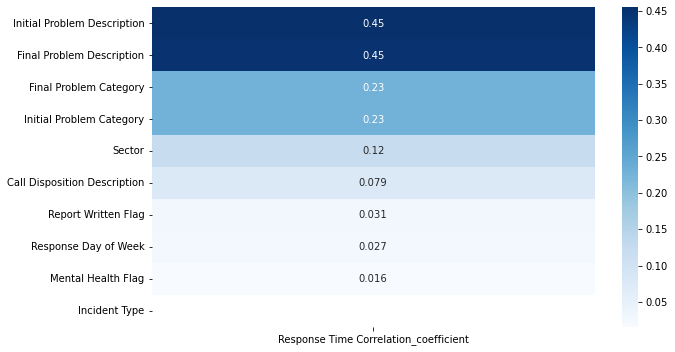

In [37]:
# Visualizing the sorted correlation analysis result using seaborn heatmap for graphical representation
plt.figure(figsize=(10, 5))
sns.heatmap(data=categorical_corr_analysis_df, annot=True, cmap='Blues')
plt.tight_layout()
plt.show()

In [38]:
numerical_df = APD_df.select_dtypes(exclude='object').drop(columns=['Response Time', 'Response Datetime', 
                                                                    'First Unit Arrived Datetime', 'Call Closed Datetime'])

In [39]:
mi_scores_num = mutual_info_regression(numerical_df, y, n_jobs=-1)

In [40]:
mi_scores_num_df = pd.DataFrame(mi_scores_num, index=numerical_df.columns, columns=['mutual_info_score'])

In [41]:
mi_scores_num_df = mi_scores_num_df.sort_values(ascending=False, by='mutual_info_score')

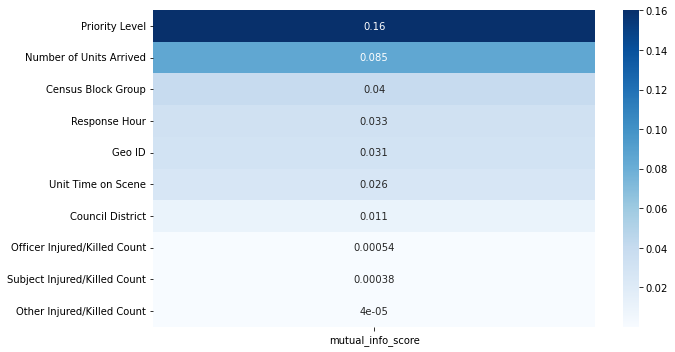

In [42]:
plt.figure(figsize=(10, 5))
sns.heatmap(data=mi_scores_num_df, annot=True, cmap='Blues')
plt.tight_layout()
plt.show()

In [43]:
numerical_corr_analysis = numerical_df.corrwith(APD_df['Response Time'], method='spearman').map('{:.4f}'.format)

C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [44]:
numerical_corr_analysis_df = numerical_corr_analysis.to_frame(name='Response Time Correlation_coefficient')

In [45]:
numerical_corr_analysis_df['Response Time Correlation_coefficient'] = numerical_corr_analysis_df['Response Time Correlation_coefficient'].astype('float64')

In [46]:
numerical_corr_analysis_df = numerical_corr_analysis_df.sort_values(ascending=False, by='Response Time Correlation_coefficient')

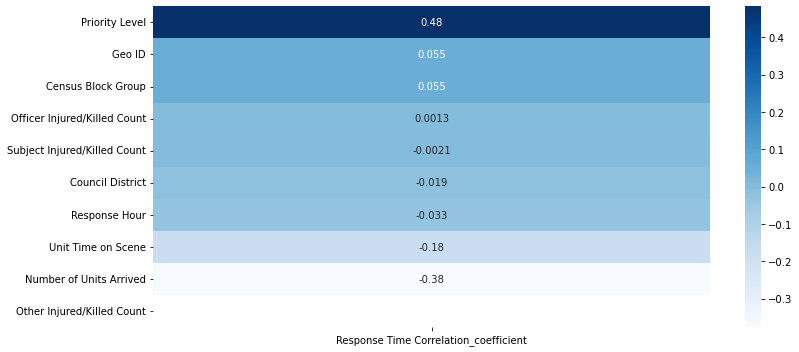

In [47]:
plt.figure(figsize=(12, 5))
sns.heatmap(data=numerical_corr_analysis_df, cmap='Blues', annot=True)
plt.tight_layout()
plt.show()

In [48]:
corr_df = pd.concat([numerical_df, X_encoded], axis=1)

In [49]:
corr_df['Response Time'] = APD_df['Response Time']

In [50]:
corr_analysis = corr_df.corr(method='spearman')

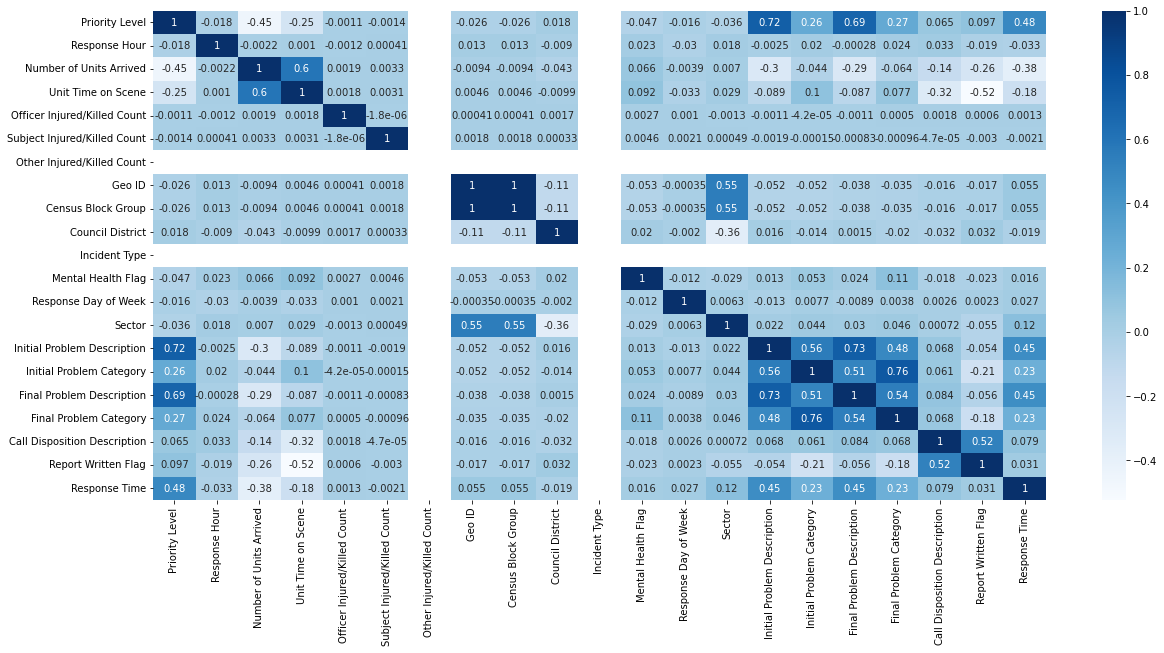

In [51]:
plt.figure(figsize=(20, 9))
sns.heatmap(data=corr_analysis, cmap='Blues', annot=True)
plt.show()

In [55]:
numerical_corr_columns = ['Priority Level', 'Unit Time on Scene', 'Number of Units Arrived']
categorical_corr_columns = ['Initial Problem Description', 'Final Problem Description', 'Final Problem Category', 'Initial Problem Category', 'Sector']

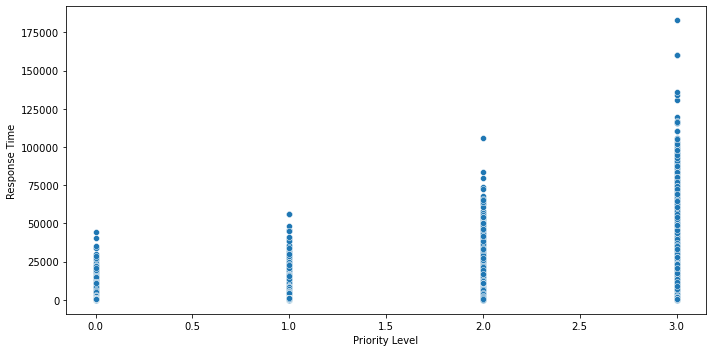

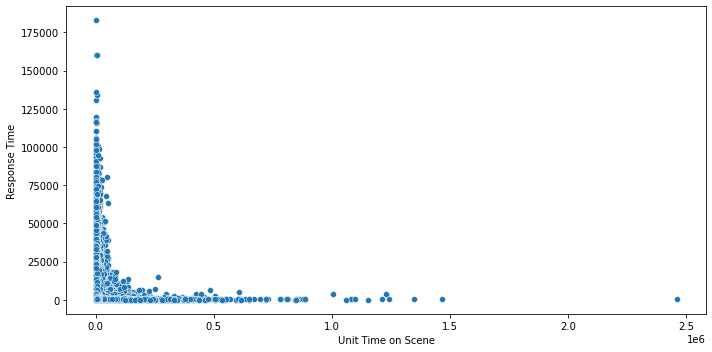

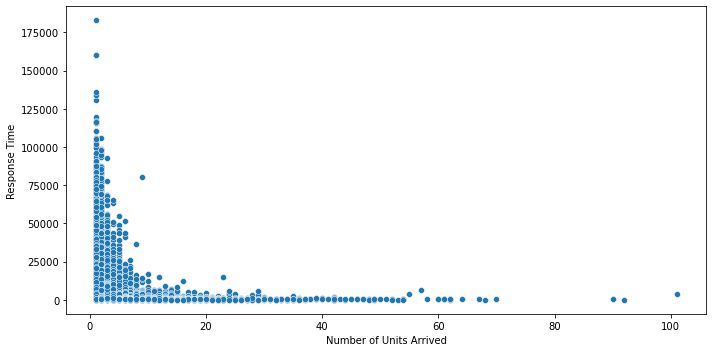

In [57]:
for col in numerical_corr_columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=APD_df, x=col, y='Response Time')
    plt.tight_layout()
    plt.show()

In [60]:
# for col in categorical_corr_columns:
#     plt.figure(figsize=(12, 5))
#     sns.barplot(data=APD_df, y=col, x='Response Time', estimator=np.median)
#     plt.tight_layout()
#     plt.show()

In [ ]:
categorical_corr_columns = ['Initial Problem Description', 'Final Problem Description', 'Final Problem Category', 'Initial Problem Category', 'Sector']

In [74]:
APD_df.loc[APD_df['Initial Problem Description'] != APD_df['Final Problem Description']]

,Incident Number,Incident Type,Mental Health Flag,Priority Level,Response Datetime,Response Day of Week,Response Hour,First Unit Arrived Datetime,Call Closed Datetime,Sector,Initial Problem Description,Initial Problem Category,Final Problem Description,Final Problem Category,Number of Units Arrived,Unit Time on Scene,Call Disposition Description,Report Written Flag,Response Time,Officer Injured/Killed Count,Subject Injured/Killed Count,Other Injured/Killed Count,Geo ID,Census Block Group,Council District
3,242741638,Dispatched Incident,Mental Health Incident,3,2024-09-30 23:54:32,Mon,23.0,2024-10-01 01:23:52,2024-10-01 01:23:56,Edward,Suspicious Person,Suspicious Things,Check Welfare Service,Welfare Check,1.0,4.0,No Report,No,5503.0,0.0,0.0,0.0,4.845304e+11,4.530442e+09,7.0
7,242741631,Dispatched Incident,Not Mental Health Incident,2,2024-09-30 23:49:12,Mon,23.0,2024-10-01 00:02:31,2024-10-01 05:48:58,Baker,Crash Urgent,Crashes,Dwi,DUI/DWI,3.0,33614.0,Report Written,Yes,836.0,0.0,0.0,0.0,4.845300e+11,4.530006e+09,9.0
10,242741627,Dispatched Incident,Not Mental Health Incident,2,2024-09-30 23:45:58,Mon,23.0,2024-09-30 23:55:08,2024-10-01 00:18:00,Frank,Alarm Burglar,Alarms,False Burglar Alarm,Alarms,2.0,2160.0,False Alarm,No,567.0,0.0,0.0,0.0,4.845300e+11,4.530024e+09,2.0
12,242741624,Dispatched Incident,Not Mental Health Incident,2,2024-09-30 23:41:44,Mon,23.0,2024-09-30 23:49:25,2024-10-01 00:46:08,Charlie,Traffic Hazard,Traffic Stop/Hazard,Assist Complainant,Assistance,2.0,5954.0,No Report,No,490.0,0.0,0.0,0.0,4.845300e+11,4.530022e+09,1.0
14,242741617,Dispatched Incident,Not Mental Health Incident,3,2024-09-30 23:36:26,Mon,23.0,2024-09-30 23:38:19,2024-09-30 23:53:16,Airport,Assist Non Emergency,Assistance,Airport Unattended Bag / Lugg,Suspicious Things,1.0,897.0,No Report,No,113.0,0.0,0.0,0.0,4.845398e+11,4.539800e+09,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952796,211730737,Dispatched Incident,Not Mental Health Incident,0,2021-06-22 13:12:51,Tue,13.0,2021-06-22 13:16:06,2021-06-22 15:01:48,Adam,Trespass Urgent,Trespassing,Request Apprehen,Warrants/RTA,2.0,11892.0,Report Written,Yes,218.0,0.0,0.0,0.0,4.845304e+11,4.530414e+09,7.0
952797,211730736,Dispatched Incident,Mental Health Incident,1,2021-06-22 13:12:12,Tue,13.0,2021-06-22 13:25:41,2021-06-22 14:52:22,Charlie,Disturbance Hs,Disturbance,Family Disturbance,Disturbance,4.0,9614.0,Report Written MH,No,891.0,0.0,0.0,0.0,4.845300e+11,4.530009e+09,3.0
952801,211730720,Dispatched Incident,Mental Health Incident,1,2021-06-22 13:04:28,Tue,13.0,2021-06-22 13:09:30,2021-06-22 15:31:17,Frank,Check Welfare Urgent,Welfare Check,Emergency Detention,Welfare Check,2.0,10407.0,Report Written MH,No,317.0,0.0,0.0,0.0,4.845300e+11,4.530024e+09,2.0
952802,211730717,Dispatched Incident,Mental Health Incident,1,2021-06-22 13:02:37,Tue,13.0,2021-06-22 13:24:06,2021-06-22 15:08:09,Baker,Check Welfare Urgent,Welfare Check,Emergency Detention,Welfare Check,2.0,8143.0,Report Written,Yes,1376.0,0.0,0.0,0.0,4.845300e+11,4.530004e+09,9.0
